In [1]:
# Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading Dataset

In [4]:
os.chdir("E:/")

In [5]:
dp = pd.read_csv("Final Transactions.csv")

In [6]:
# Data head

In [7]:
dp.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [8]:
# Dropping unnecessary columns

In [9]:
dp.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
dp.drop(columns=['TRANSACTION_ID'], inplace=True)

In [11]:
dp.drop(columns=['TX_DATETIME'], inplace=True)

In [12]:
dp.drop(columns=['CUSTOMER_ID'], inplace=True)

In [13]:
dp.drop(columns=['TERMINAL_ID'], inplace=True)

In [14]:
# We used Linear regression to check which feature have more effect in target variable 
# We notice that 'TX_FRAUD_SCENARIO ' have more effect which is manipulating uor target variable. so, we drop that column

In [15]:
x = dp.drop('TX_FRAUD', axis = 1)
y = dp['TX_FRAUD']
# Implementing linear regression 
Linear_regression = LinearRegression()
Linear_regression.fit(x, y)

# Get the coefficients
coefficients = pd.Series(Linear_regression.coef_, index=x.columns)

sorted_coefficients = coefficients.abs().sort_values(ascending=False)

print("Feature Importance:")
print(sorted_coefficients)


Feature Importance:
TX_FRAUD_SCENARIO    8.721988e-01
TX_TIME_DAYS         1.784943e-04
TX_AMOUNT            2.877521e-05
TX_TIME_SECONDS      1.930786e-09
dtype: float64


In [16]:
dp.drop(columns=['TX_FRAUD_SCENARIO'], inplace=True)

In [17]:
# Data Description (Mean, Medium, Model, etc.,)

In [18]:
dp.describe()

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,5.396820e+02,7.903234e+06,9.097260e+01,1.345200e-01
std,1.179711e+03,4.565172e+06,5.283709e+01,3.412103e-01
min,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00
25%,1.799500e+02,3.940846e+06,4.500000e+01,0.000000e+00
50%,4.217500e+02,7.902670e+06,9.100000e+01,0.000000e+00
75%,7.505950e+02,1.186566e+07,1.370000e+02,0.000000e+00
max,6.478375e+05,1.581120e+07,1.820000e+02,1.000000e+00


In [19]:
# Checking null values

In [20]:
dp.isnull().sum()

TX_AMOUNT          0
TX_TIME_SECONDS    0
TX_TIME_DAYS       0
TX_FRAUD           0
dtype: int64

In [21]:
# Checking duplicated values

In [22]:
dp.duplicated().sum()

1

In [23]:
# Dropping duplicated values

In [24]:
dp.drop_duplicates(inplace=True)

In [25]:
dp.duplicated().sum()

0

In [26]:
# Data Visulization

In [27]:
# Box Plot

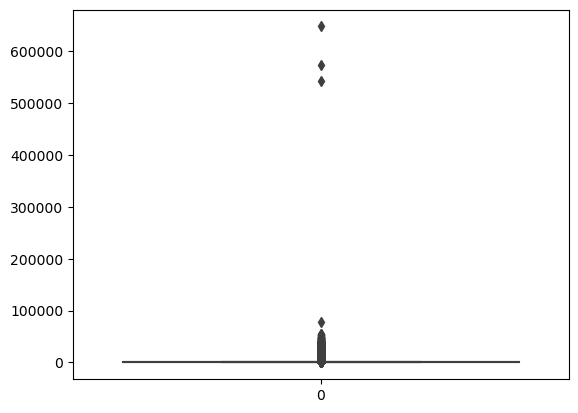

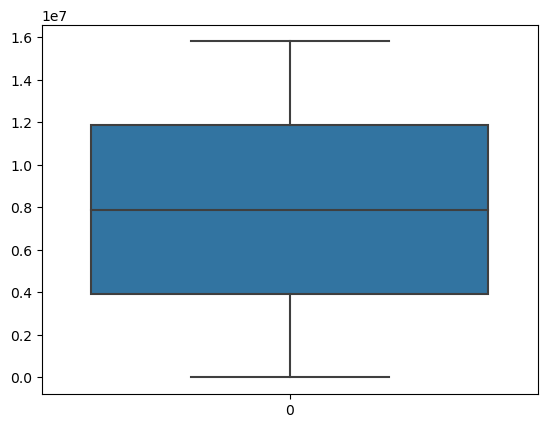

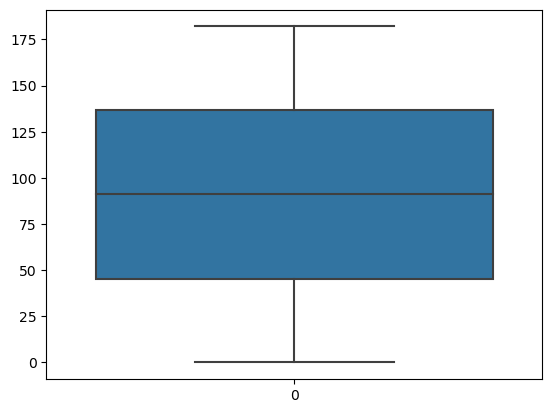

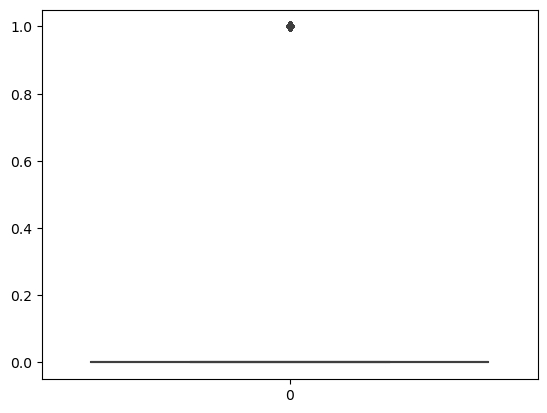

In [28]:
for i in dp.columns:
    sns.boxplot(dp[i])
    plt.show()

In [29]:
# Histogram

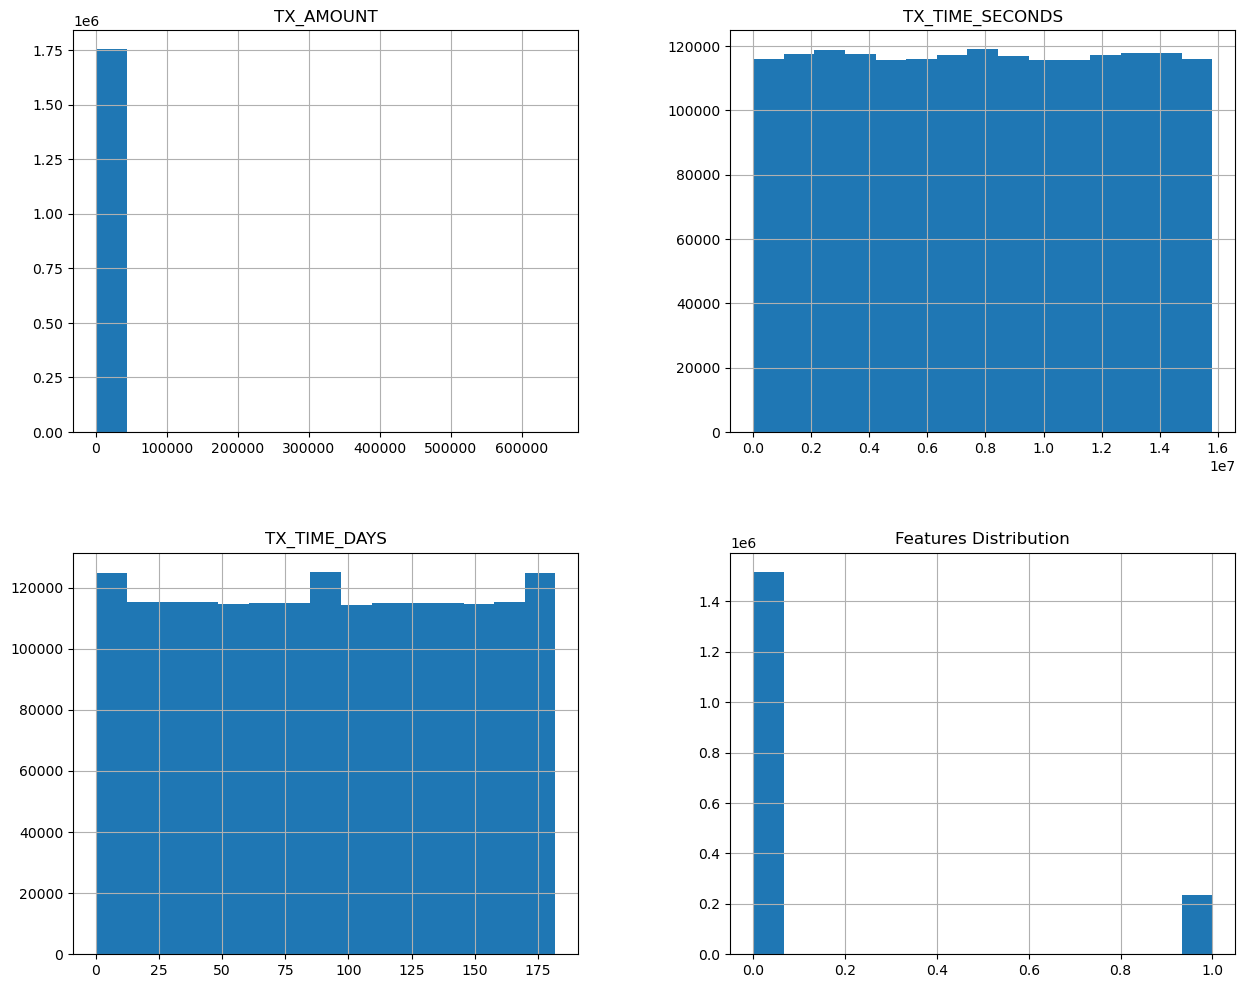

In [30]:
dp.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [31]:
# Correlation metrics

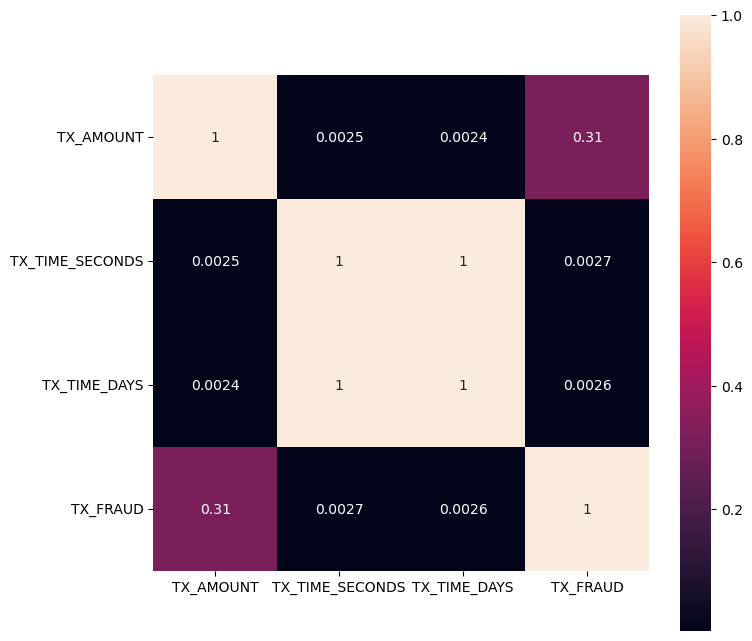

In [32]:
ax = plt.subplots(figsize = (8,8))
corr = dp.corr()
ax = sns.heatmap(corr , annot = True , square = True)
plt.yticks(rotation = 0)
plt.show()

In [33]:
# Data types

In [34]:
dp.dtypes

TX_AMOUNT          float64
TX_TIME_SECONDS      int64
TX_TIME_DAYS         int64
TX_FRAUD             int64
dtype: object

In [35]:
dp['TX_FRAUD'].unique()

array([0, 1], dtype=int64)

In [36]:
# Checking number of values in 'TX_FRAUD' column

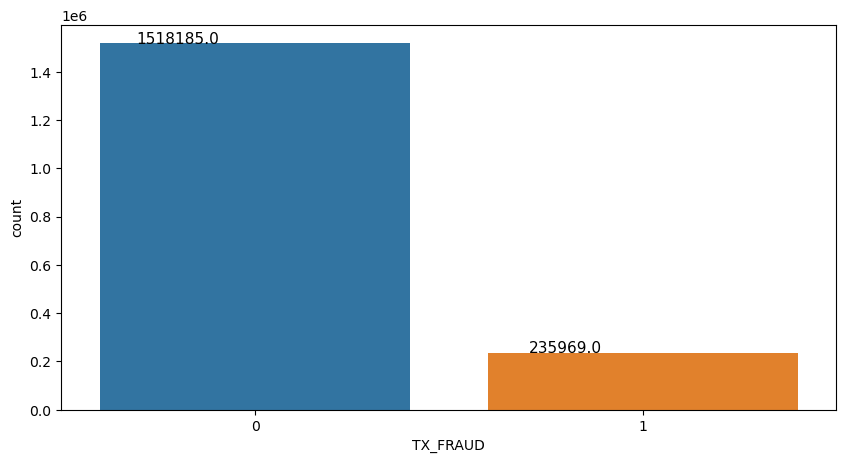

In [37]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data=dp,x='TX_FRAUD')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=11, ha="center")

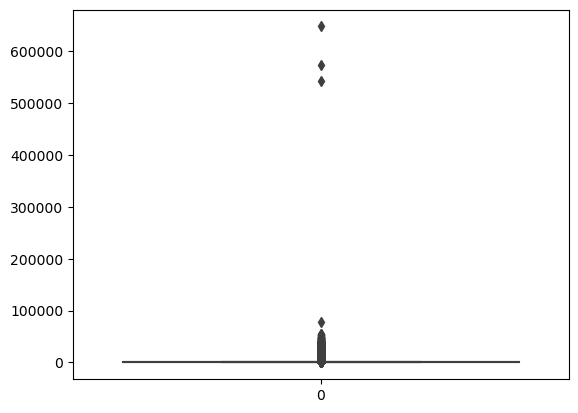

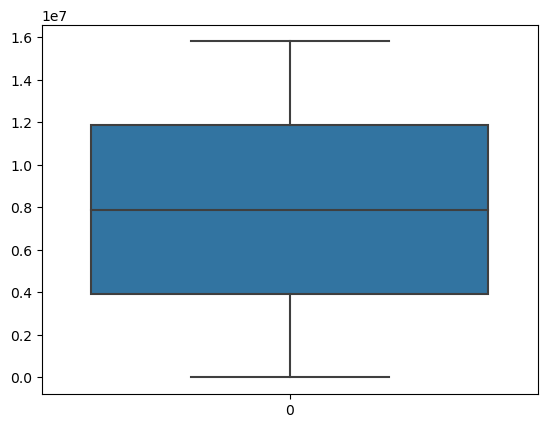

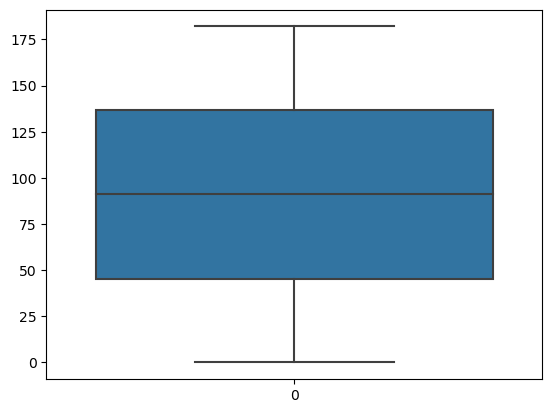

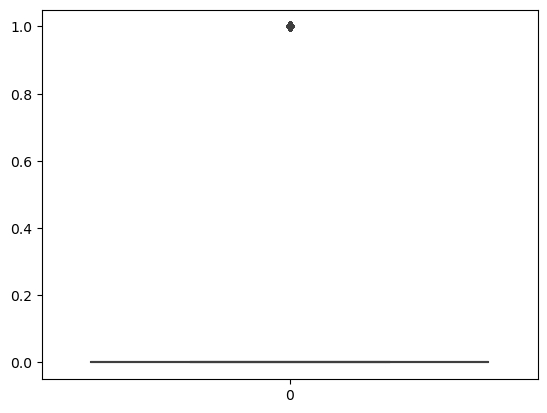

In [38]:
for i in dp.columns:
    sns.boxplot(dp[i])
    plt.show()

In [39]:
# Splitting data in 80:20, train and test split

In [40]:
X = dp.drop('TX_FRAUD', axis = 1)
Y = dp['TX_FRAUD']

print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (1754154, 3)
Y shape:  (1754154,)


In [41]:
# Train and test split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (1403323, 3)
Y_train shape:  (1403323,)
X_test shape:  (350831, 3)
Y_test shape:  (350831,)


In [43]:
# Implementing Logistic regression

In [44]:
Lr= LogisticRegression(random_state=0)  
Lr.fit(X_train, Y_train)
Lr_Y_pred = Lr.predict(X_test)

In [45]:
# Evaluate the model

In [46]:
print(confusion_matrix(Y_test,Lr_Y_pred))
print(classification_report(Y_test,Lr_Y_pred))
print("Accuracy:" , metrics.accuracy_score(Y_test, Lr_Y_pred))
print("Precision:" , metrics.precision_score(Y_test, Lr_Y_pred))
print("Recall:" , metrics.recall_score(Y_test, Lr_Y_pred))

[[299290   4206]
 [  6399  40936]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    303496
           1       0.91      0.86      0.89     47335

    accuracy                           0.97    350831
   macro avg       0.94      0.93      0.93    350831
weighted avg       0.97      0.97      0.97    350831

Accuracy: 0.9697717704535802
Precision: 0.906827344823003
Recall: 0.8648146192035492


In [47]:
# Using SMOTE to change inbalance data to balance

In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train,Y_train = sm.fit_resample(X_train,Y_train)

In [49]:
# Number of unique value in'TX_FRAUD' column

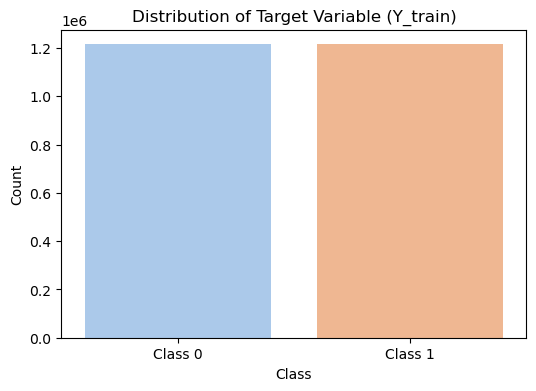

In [50]:
import seaborn as sns

# Plotting the distribution of the target variable Y_train
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_train, palette='pastel')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (Y_train)')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

In [51]:
# implementing logistic regression gain after applying SMOTE

In [52]:
Lr= LogisticRegression(random_state=0)  
Lr.fit(X_train, Y_train)
Lr_Y_pred = Lr.predict(X_test)

In [53]:
# Evaluate the model

In [54]:
print(confusion_matrix(Y_test,Lr_Y_pred))
print(classification_report(Y_test,Lr_Y_pred))
print("Accuracy:" , metrics.accuracy_score(Y_test, Lr_Y_pred))
print("Precision:" , metrics.precision_score(Y_test, Lr_Y_pred))
print("Recall:" , metrics.recall_score(Y_test, Lr_Y_pred))

[[288893  14603]
 [  1573  45762]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    303496
           1       0.76      0.97      0.85     47335

    accuracy                           0.95    350831
   macro avg       0.88      0.96      0.91    350831
weighted avg       0.96      0.95      0.96    350831

Accuracy: 0.9538923299252346
Precision: 0.758088296198128
Recall: 0.9667687757473329


In [55]:
# Implementing KNN algorithm with k-values from 1-20 and picking the right k-value which have high precison, 
#recall and accuracy

In [56]:
k_values = list(range(1, 21))
accuracy_scores = []
precision_scores = []
recall_scores = []

best_knn_accuracy = 0
best_knn_precision = 0
best_knn_recall = 0
best_knn_confusion_matrix = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, Y_train)
    
    knn_Y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(Y_test, knn_Y_pred)
    precision = precision_score(Y_test, knn_Y_pred)
    recall = recall_score(Y_test, knn_Y_pred)
    
    if accuracy > best_knn_accuracy:
        best_knn_accuracy = accuracy
        best_knn_precision = precision
        best_knn_recall = recall
        best_knn_confusion_matrix = confusion_matrix(Y_test, knn_Y_pred)
        best_knn_classification = classification_report(Y_test, knn_Y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

In [57]:
# Evaluate the model

In [58]:
print("Best KNN Model Metrics:")
print(best_knn_classification)
print("Accuracy:", best_knn_accuracy)
print("Precision:", best_knn_precision)
print("Recall:", best_knn_recall)
print("Confusion Matrix:\n", best_knn_confusion_matrix)

Best KNN Model Metrics:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    303496
           1       0.90      0.89      0.89     47335

    accuracy                           0.97    350831
   macro avg       0.94      0.94      0.94    350831
weighted avg       0.97      0.97      0.97    350831

Accuracy: 0.971724277501133
Precision: 0.8997756170531039
Recall: 0.8895109327136368
Confusion Matrix:
 [[298806   4690]
 [  5230  42105]]


In [59]:
# Ploting go accuracy with different k-values

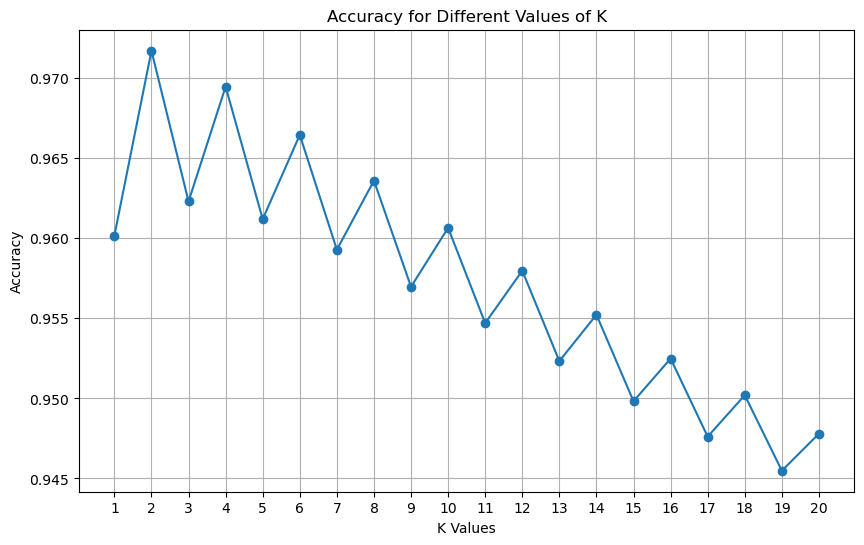

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy for Different Values of K')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [61]:
# Implementing Random Forest Classifier

In [62]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, Y_train)
rf_Y_pred = rf_classifier.predict(X_test)

In [63]:
# Evaluate the model

In [64]:
print(confusion_matrix(Y_test, rf_Y_pred))
print(classification_report(Y_test, rf_Y_pred))
print("Accuracy:" , metrics.accuracy_score(Y_test, rf_Y_pred))
print("Precision:" , metrics.precision_score(Y_test, rf_Y_pred))
print("Recall:" , metrics.recall_score(Y_test, rf_Y_pred))

[[302918    578]
 [  1649  45686]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    303496
           1       0.99      0.97      0.98     47335

    accuracy                           0.99    350831
   macro avg       0.99      0.98      0.99    350831
weighted avg       0.99      0.99      0.99    350831

Accuracy: 0.9936522143140144
Precision: 0.9875064845236037
Recall: 0.9651631984789268
